In [1]:
import h5py
import numpy as np
from matplotlib import pyplot
from tqdm import tqdm_notebook as tqdm

In [2]:
filename_train = '../Data/train_shifted.h5'
f = h5py.File(filename_train, 'r')

In [3]:
images_train = f['shiftedImg'][:].reshape(-1,4096)
#images_train = f['all_events']['hist'][:].reshape(-1,4096)
#labels_train = f['all_events']['y'][:]

#images_test = f_test['all_events']['hist'][:].reshape(-1,4096)
#labels_test = f_test['all_events']['y'][:]

In [4]:
print(images_train.shape)

(412416, 4096)


# log of values

In [ ]:
#images_train=np.log(images_train)

# Distribution plot

In [ ]:
print(np.amax(images_train))

In [ ]:
print(np.amin(images_train))

In [ ]:
bins = np.linspace(0,.01,100)

In [ ]:
%matplotlib inline
pyplot.hist(images_train,bins)
pyplot.xlabel
pyplot.savefig("values distribution including 0")

# plot without 0

In [6]:
X = []
X=images_train[images_train!=0]

In [7]:
X =np.asarray(X).reshape(-1,1)

In [ ]:
print(X.shape)
#print(Y.shape)

In [ ]:
for i in range(4096):
    print(images_train[0][i])

In [ ]:
print(np.amax(X))
print(np.amin(X))

In [ ]:
bins = np.linspace(0,.01,100)
print(bins.shape)
%matplotlib inline
pyplot.hist(X,bins)
pyplot.xlabel
pyplot.savefig("values distribution without 0")

# Binning

### Find Bin boundary

In [8]:
X =np.sort(X,axis=0)

In [9]:
X = np.array(X)

In [11]:
data_bins = []
#bins = bins.reshape(14,1)
for i in range(2):
    data_bins.append(X[(i+1)*int(X.shape[0]/3)])
    print(data_bins[i])

[0.00031528]
[0.00091565]


In [ ]:
#save databins to be used for training set

In [12]:
np.save('BinningInfo/4bins',data_bins)

### plot bins

(100,)


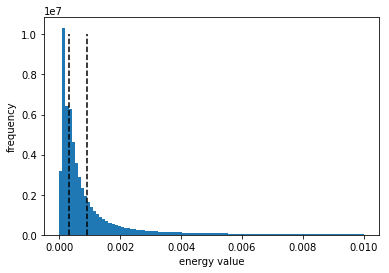

In [14]:
bins = np.linspace(0,.01,100)
print(bins.shape)
%matplotlib inline
pyplot.hist(X,bins)
pyplot.plot((data_bins[0],data_bins[0]),(0,1e7),'k--')
pyplot.plot((data_bins[1],data_bins[1]),(0,1e7),'k--')
pyplot.ylabel("frequency")
pyplot.xlabel("energy value")
pyplot.savefig("distribution plot")

### Bin data

In [15]:
final_op_train = np.zeros((images_train.shape[0],images_train.shape[1],3),dtype=bool)

In [16]:
images_train.shape

(412416, 4096)

In [17]:
#final_op_train[images_train>data_bins[5]] = np.array(list('111'), dtype=int).astype(bool)
#final_op_train[(images_train>data_bins[4]) & (images_train<=data_bins[5])] = np.array(list('110'), dtype=int).astype(bool)
#final_op_train[(images_train>data_bins[3]) & (images_train<=data_bins[4])] = np.array(list('101'), dtype=int).astype(bool)
#final_op_train[(images_train>data_bins[2]) & (images_train<=data_bins[3])] = np.array(list('100'), dtype=int).astype(bool)
#final_op_train[(images_train>data_bins[1]) & (images_train<=data_bins[2])] = np.array(list('011'), dtype=int).astype(bool)
final_op_train[(images_train>data_bins[1])] = np.array(list('111'), dtype=int).astype(bool)
final_op_train[(images_train>data_bins[0]) & (images_train<=data_bins[1])] = np.array(list('011'), dtype=int).astype(bool)
final_op_train[(images_train>0) & (images_train<=data_bins[0])] = np.array(list('001'), dtype=int).astype(bool)
final_op_train[images_train==0] = np.array(list('000'), dtype=int).astype(bool)

In [ ]:
#print(images[images>data_bins[5]])

In [19]:
final_op_train = final_op_train.reshape(final_op_train.shape[0],-1)

In [ ]:
hf_train = h5py.File("../BinaryData/3bits4binstrain_shifted.h5","w")
hf_train.create_dataset("inputs",data=final_op_train)
hf_train.close()